The following code is an implementation of the Value class from the tutorial, based on memory and understanding.

In [1]:
# introduction

a = 2.0
b = -3.5
c = 9.0
d = 1.5
e =  a + b
f = c*e
L = f + d

# Essentially what backproppagation does is 
# evaluating the derivative of L with respect to
# its constituent variables, i.e. a, b, c, d, e, f

To start, a Value class has to be created to store floats, and to allow extra operations on the specific value

In [34]:
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0
        # stores its operands
        self._children = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), "+")
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), "*")
    


In [41]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(5.0, label="c")
e = a*b; e.label = "e"
d = e + c; d.label = "d"
f = Value(-2.0, label="f")
L = d * f; L.label = "L"

In [37]:
# Visualisation of tree
from graphviz import Digraph

# Obtain nodes and edges from root node
def trace(root):
    nodes, edges = set(), set()
    def dfs(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._children:
                edges.add((child, v))
                dfs(child)
    dfs(root)
    return nodes, edges

def draw(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"}) # Left to Right graph

    nodes, edges = trace(root)
    for n in nodes:
        # create unique uid for node
        uid = str(id(n))
        # Create node in graph
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape="record")
        if n._op:
            # create node of operation if its a result of one
            dot.node(name = uid + n._op, label = n._op)
            # connect operation to its result node
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect all nodes
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot


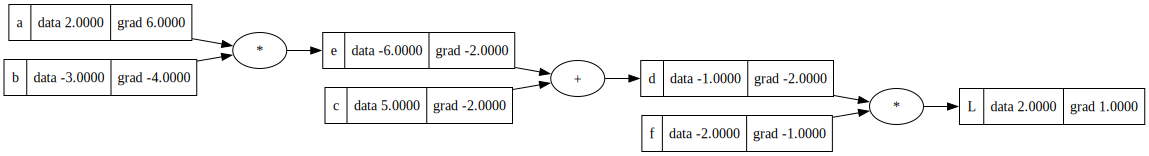

In [47]:
draw(L)

In [43]:
def test():
    h = 0.001

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(5.0, label="c")
    e = a*b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(5.0, label="c")
    e = a*b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f; L.label = "L"
    L2 = L.data + h

    print((L2 - L1)/h)

test()


0.9999999999998899


| Var | exp                                 | grad |
|-----|-------------------------------------|------|
| L   | $\frac{dL}{dL}$ = 1                           | 1    |
| d   | $\frac{dL}{dd}$ = f                           | -2   |
| f   | $\frac{dL}{df}$ = d                           | -1   |
| e   | $\frac{dL}{de}$ = $\frac{dL}{dd}$ * $\frac{dd}{de}$ = -2 * 1 = -2 | -2   |
| c   | $\frac{dL}{dc}$ = $\frac{dL}{dd}$ * $\frac{dd}{dc}$ = -2 * 1 = -2 | -2   |
| b   | $\frac{dL}{db}$ = $\frac{dL}{de}$ * $\frac{de}{db}$ = -2 * 2 = -4 | -4    |
| a   | $\frac{dL}{da}$ = $\frac{dL}{de}$ * $\frac{de}{da}$ = -2 * -3 = 6 | 6   |

In [46]:
L.grad = 1.0
d.grad = -2.0
f.grad = -1.0
e.grad = -2.0
c.grad = -2.0
b.grad = -4.0
a.grad = 6.0
